In [10]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from PIL import Image
import numpy as np
import io

In [11]:
prediction_key = "cc4e7910294b4d3bb0cd9e59c9a1fe33"
prediction_endpoint = "https://b021customvision-prediction.cognitiveservices.azure.com/"
project_id = "46eb142e-665d-45dc-8942-41ab48c89225"
model_name = "Iteration1"

pass_probability = 0.8

credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

In [12]:
def ndarr_to_bytearr(nd_arr, format):
    byte_arr = io.BytesIO()
    nd_arr.save(byte_arr, format=format)
    byte_arr = byte_arr.getvalue()
    return byte_arr

In [13]:
def split_detect_image(image, predict_results):
    h, w, ch = np.array(image).shape

    detections = []
    for prediction in predict_results. predictions:
        if prediction.probability > pass_probability:
            print(f'{float(prediction.probability*100.0):.2f}')
            left = prediction.bounding_box.left * w
            top = prediction.bounding_box.top * h
            right = left + prediction.bounding_box.width * w
            bottom = top + prediction.bounding_box.height * h

            cropped_img = image.crop((left, top, right, bottom))
            detections.append(cropped_img)

    return detections

In [14]:
def animal_detect(image):
    image_data = ndarr_to_bytearr(image, image.format)
    results = predictor.detect_image(project_id, model_name, image_data)
    detections = split_detect_image(image, results)
    return detections

In [15]:
test_img = Image.open(r'test_data/hippo_lion.jpg')
detect_img = animal_detect(test_img)

99.71
94.36


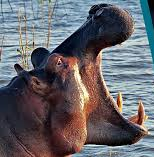

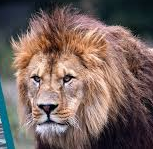

In [16]:
from IPython.display import display

for img in detect_img:
    display(img)

In [ ]:
class ClassificationURL:
    def __init__(self, key, endpoint, id, model):
        self.prediction_key = key
        self.prediction_endpoint = endpoint
        self.project_id = id
        self.model_name = model

        credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
        self.predictor = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

In [ ]:
dic_classification = {
    'tiger' : ClassificationURL(
        'cc4e7910294b4d3bb0cd9e59c9a1fe33',
        'https://b021customvision-prediction.cognitiveservices.azure.com/',
        'ae6e8a0e-125e-458e-bc7b-415740df5c8f',
        'Iteration1'
    ),
    'panda' : ClassificationURL(
        'cc4e7910294b4d3bb0cd9e59c9a1fe33',
        'https://b021customvision-prediction.cognitiveservices.azure.com/',
        '7feb636d-53d2-46c9-b3fe-6ee673b4c033',
        'Iteration2'
    ),
    'zebra' : ClassificationURL(
        'cc4e7910294b4d3bb0cd9e59c9a1fe33',
        'https://b021customvision-prediction.cognitiveservices.azure.com/',
        'd072742e-fbfd-4178-b302-485b5503200e',
        'Iteration5',
    ) 
}

In [ ]:
classfy_probability = 0.8

detect_name = []
if names.count != 0:
    url_info = dic_classification.get(names[0])
    if url_info != None:
        image_data = ndarr_to_bytearr(detect_img[0], test_img.format)
        results = url_info.predictor.classify_image(url_info.project_id, url_info.model_name, image_data)
        for prediction in results.predictions:
            if prediction.probability > classfy_probability:
                detect_name.append(prediction.tag_name)
                print(prediction.tag_name, prediction.probability)
    else:
        names
else:
    names